# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Dataset Ajwa Or Medjool menggunakan Menggunakan Metode KNN

<b>Kelompok: 7</b>

Anggota:
1. Indah Pratiwi (1301223157)
2. M. Alfath Kaffahmi (1301223173)
3. Mahardhika Fernanda (1301223191)

## **Pendahuluan**



Dataset Ajwa or Medjool merupakan sebuah dataset yang berisi informasi tentang 2 kurma, yaitu Ajwa dan Medjool. Kurma Ajwa dikenal sebagai kurma yang berkualitas dan berasal dari arab Saudi, sementara kurma Medjool adalah jenis kurma yang popular di Amerika serikat. Dengan melakukan klasifikasi pada dataset ini, dapat diidentifikasi jenis kurma, seperti :
1. Date Length (cm)
2. Date Diameter (cm)
3. Date Weight (g)
4. Pit Length (cm)
5. Calories (Kcal)
6. Color

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter

ModuleNotFoundError: No module named 'pandas'

In [ ]:
dt = pd.read_csv('AjwaOrMejdool.csv', delimiter= ';')

## **Visualisasi Data**

In [ ]:
#Tabel Dataset
dt

,Date Length (cm),Date Diameter (cm),Date Weight (g),Pit Length (cm),Calories (Kcal),Color,Class (Ajwa or Medjool)
0,3.2,2.0,12,2.2,41.28,Black,Ajwa
1,3.5,1.8,11,1.9,37.84,Black,Ajwa
2,3.0,1.7,9,2.0,30.96,Black,Ajwa
3,3.1,2.0,10,1.9,34.40,Black,Ajwa
4,2.8,1.8,9,1.9,30.96,Black,Ajwa
5,3.1,1.9,12,2.2,41.28,Black,Ajwa
6,3.2,2.2,13,1.9,44.72,Black,Ajwa
7,3.1,1.7,12,2.1,41.28,Black,Ajwa
8,3.6,2.5,9,2.7,30.96,Black,Ajwa
9,3.8,1.8,10,1.9,34.40,Black,Ajwa


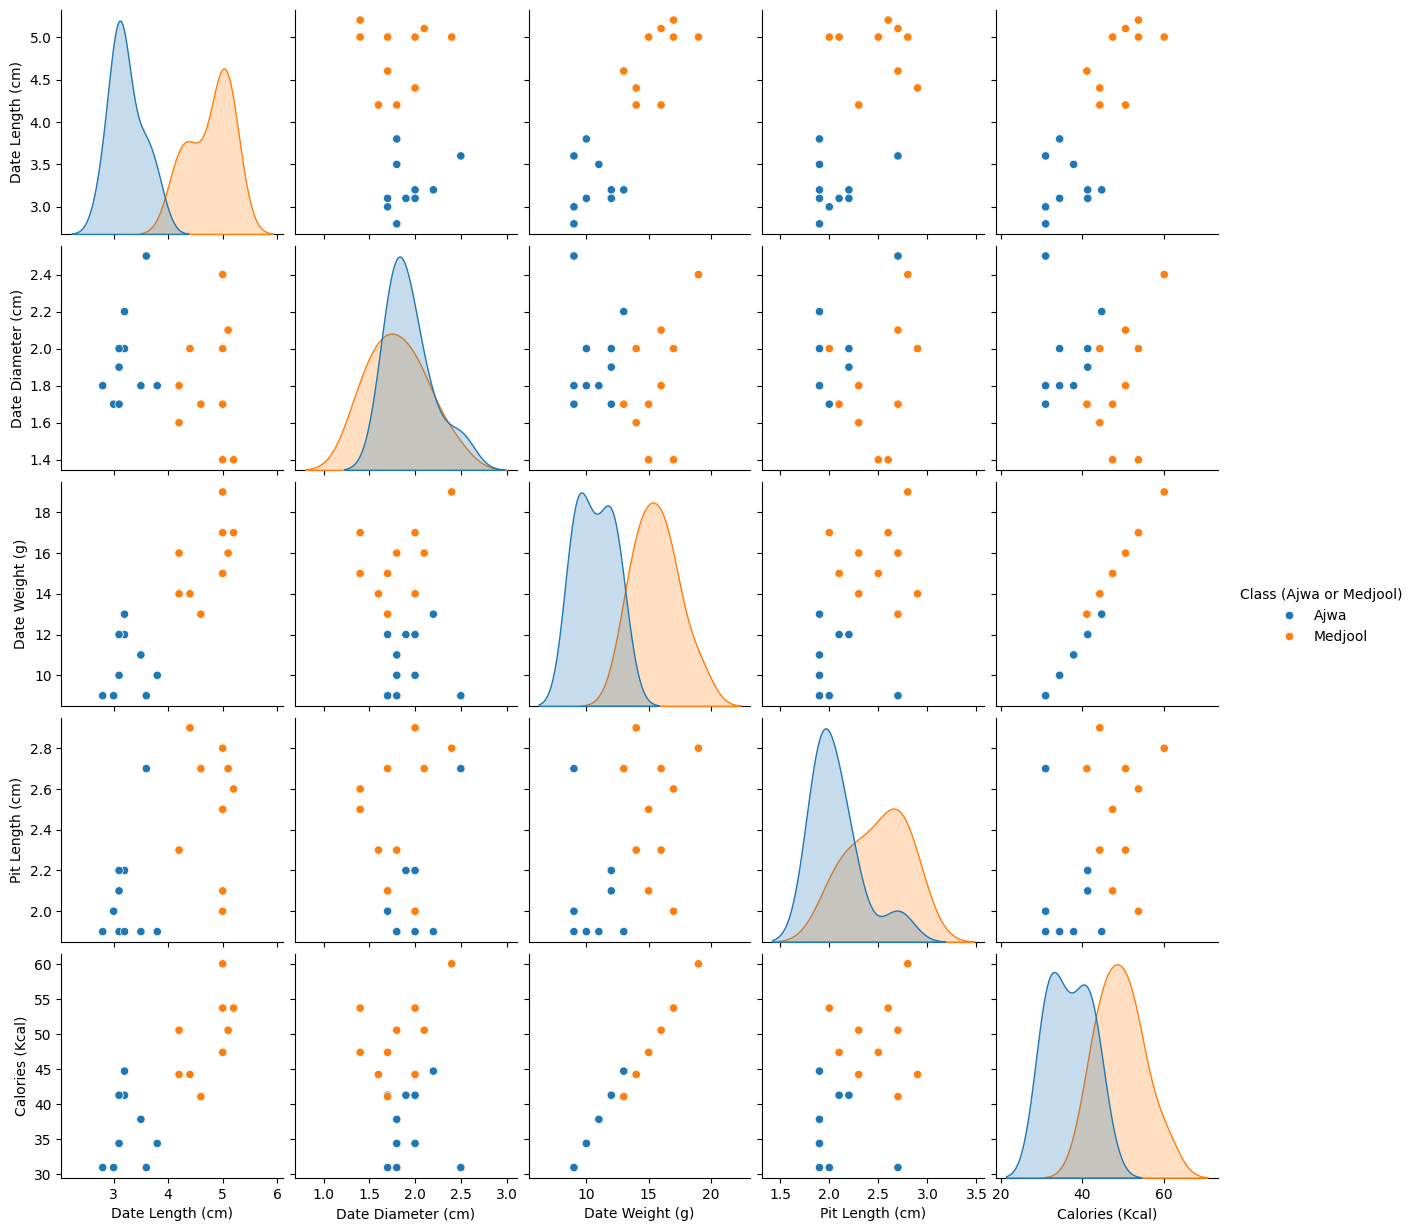

In [ ]:
#Semua plot hubungan antar variabel
sns.pairplot(dt, hue="Class (Ajwa or Medjool)");

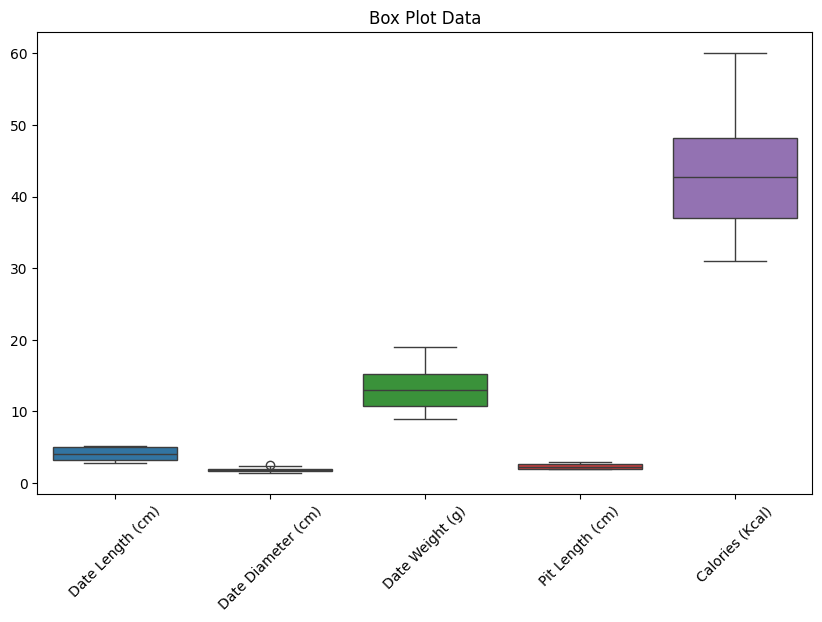

In [ ]:
#Visualisasi dari Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dt)
plt.title('Box Plot Data')
plt.xticks(rotation = 45)
plt.show()

## Data Preprocessing

In [ ]:
#mengecek informasi data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Length (cm)         20 non-null     float64
 1   Date Diameter (cm)       20 non-null     float64
 2   Date Weight (g)          20 non-null     int64  
 3   Pit Length (cm)          20 non-null     float64
 4   Calories (Kcal)          20 non-null     float64
 5   Color                    20 non-null     object 
 6   Class (Ajwa or Medjool)  20 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ KB


In [ ]:
dt.describe( )

,Date Length (cm),Date Diameter (cm),Date Weight (g),Pit Length (cm),Calories (Kcal)
count,20.000000,20.00000,20.000000,20.000000,20.00000
mean,4.005000,1.87500,13.150000,2.280000,43.05200
std,0.853769,0.28631,2.978431,0.347321,8.27551
min,2.800000,1.40000,9.000000,1.900000,30.96000
25%,3.175000,1.70000,10.750000,1.975000,36.98000
50%,4.000000,1.80000,13.000000,2.200000,42.76000
75%,5.000000,2.00000,15.250000,2.625000,48.19000
max,5.200000,2.50000,19.000000,2.900000,60.04000


Mnegubah data yang bertipe string menjadi numerik

In [ ]:
dt['Color'] = dt['Color'].replace({'Black': 0, 'Brown': 1})
dt['Class (Ajwa or Medjool)'] = dt['Class (Ajwa or Medjool)'].replace({'Ajwa': 0, 'Medjool': 1})

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Length (cm)         20 non-null     float64
 1   Date Diameter (cm)       20 non-null     float64
 2   Date Weight (g)          20 non-null     int64  
 3   Pit Length (cm)          20 non-null     float64
 4   Calories (Kcal)          20 non-null     float64
 5   Color                    20 non-null     int64  
 6   Class (Ajwa or Medjool)  20 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 KB


DATA SPLITTING

membagi data antara kolom atribut dan kolom yang merupakan label

In [ ]:
Label = dt.iloc[:, -1:]
Atribut = dt.iloc[:, :-1]

In [ ]:
Label

,Class (Ajwa or Medjool)
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
Atribut

,Date Length (cm),Date Diameter (cm),Date Weight (g),Pit Length (cm),Calories (Kcal),Color
0,3.2,2.0,12,2.2,41.28,0
1,3.5,1.8,11,1.9,37.84,0
2,3.0,1.7,9,2.0,30.96,0
3,3.1,2.0,10,1.9,34.40,0
4,2.8,1.8,9,1.9,30.96,0
5,3.1,1.9,12,2.2,41.28,0
6,3.2,2.2,13,1.9,44.72,0
7,3.1,1.7,12,2.1,41.28,0
8,3.6,2.5,9,2.7,30.96,0
9,3.8,1.8,10,1.9,34.40,0


Normalisasi data

In [ ]:
# Membuat salinan dari data
dt_min_max_scaled = Atribut.copy()

# melakukan proses normalisasi data
for column in dt_min_max_scaled.columns:
	dt_min_max_scaled[column] = (dt_min_max_scaled[column] - dt_min_max_scaled[column].min()) / (dt_min_max_scaled[column].max() - dt_min_max_scaled[column].min())

atribut_norm = dt_min_max_scaled

In [ ]:
#menampilkan data yg telah di normalisasi
atribut_norm

,Date Length (cm),Date Diameter (cm),Date Weight (g),Pit Length (cm),Calories (Kcal),Color
0,0.166667,0.545455,0.3,0.3,0.354883,0.0
1,0.291667,0.363636,0.2,0.0,0.236589,0.0
2,0.083333,0.272727,0.0,0.1,0.000000,0.0
3,0.125000,0.545455,0.1,0.0,0.118294,0.0
4,0.000000,0.363636,0.0,0.0,0.000000,0.0
5,0.125000,0.454545,0.3,0.3,0.354883,0.0
6,0.166667,0.727273,0.4,0.0,0.473177,0.0
7,0.125000,0.272727,0.3,0.2,0.354883,0.0
8,0.333333,1.000000,0.0,0.8,0.000000,0.0
9,0.416667,0.363636,0.1,0.0,0.118294,0.0


Pembagian data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(atribut_norm, Label, test_size=0.3, random_state=42)


In [ ]:
X_train

,Date Length (cm),Date Diameter (cm),Date Weight (g),Pit Length (cm),Calories (Kcal),Color
11,0.916667,0.000000,0.6,0.6,0.565337,1.0
3,0.125000,0.545455,0.1,0.0,0.118294,0.0
18,0.750000,0.272727,0.4,0.8,0.348006,1.0
16,0.958333,0.636364,0.7,0.8,0.674003,1.0
13,1.000000,0.000000,0.8,0.7,0.782669,1.0
2,0.083333,0.272727,0.0,0.1,0.000000,0.0
9,0.416667,0.363636,0.1,0.0,0.118294,0.0
19,0.916667,0.909091,1.0,0.9,1.000000,1.0
4,0.000000,0.363636,0.0,0.0,0.000000,0.0
12,0.916667,0.272727,0.6,0.2,0.565337,1.0


In [ ]:
y_train

,Class (Ajwa or Medjool)
11,1
3,0
18,1
16,1
13,1
2,0
9,0
19,1
4,0
12,1


## Metode Yang Digunakan

pada code ini metode yang digunakan adalah K-Nearst Neighbour


KNN adalah metode perhitungan untuk mengukur jarak dua titik dalam euclidean space yang mempelajari hubungan antara sudut dan jarak. Pada algoritma KNN untuk klasifikasi yang dipakai adalah jarak lurus antara dua titik dalam ruang Euclidean. Dalam ruang dua dimensi, jarak Euclidean antara dua titik. **P**=(p1,p2) dan **Q**=(q1,q2)) dapat dihitung dengan rumus
d(p,q) = √(P1 - 91)^2 + (P2 - 92)^2

Langkah-Langkah Algoritma KNN untuk Klasifikasi
1.	Menentukan jumlah tetangga (K): memilih nilai K, yaitu jumlah tetangga terdekat yang akan dipertimbangkan.
2.	Menghitung Jarak: Jarak antara titik data baru dalam dataset train dihitung dengan menggunakan Jarak Euclidean
3.	Menentukan Tetangga Terdekat: Memilih nilai K titik data dari dataset pelatihan yang memiliki jarak terdekat dengan titik baru.
4.	Pengkasifikasian: melakukan voting mayoritas diantara tetangga-tetangga terdekat untuk menentukan class yang paling sering muncul dianatara titik K. Class yang paling sering muncul diantara tetangga terdekat mereupakan class prediction.
5.	Hasil Prediksi: Tetapan class yang terpilih dari hasil predict untuk titik data baru.


### Model dan Testing

Menemukan k tetangga terdekat dari new_point dalam data set x_train

In [ ]:
def find_neighbour(k, x_train, new_point):
  neighbour_arr = []
  for i in range(len(x_train)):
    dist = np.sqrt(sum(np.square(x_train[i]-new_point)))          #menghitung jarak Eucliden antara new point dan setiap titik dalam x_train
    neighbour_arr.append([i, dist])                               #menyimpan nilainya dalam array neighbout
  neighbour_arr = sorted(neighbour_arr, key = lambda x : x[1])    #melakukan pengurutan array neighbour

  return neighbour_arr[0:k]

Menentukan Label dari mayoritas tetangga terdekat

In [ ]:
from collections import Counter
def classifier(neighbor, y_train):
  classarry = [y_train[i[0]] for i in neighbor]      #membuat list label dari tetangga terdekat berdasarkan indeks neighbor
  np.array(classarry)                                #menjadikan classry menjadi array
  return max(classarry,key=classarry.count)

Menentukan Prediksi label dari titik-titik di x_test

In [ ]:
def predict(x_train, x_test, y_train):
  predict_axis = []
  points = np.array(x_train)
  new_points = np.array(x_test)
  train_point = np.array(y_train)
  for i in new_points:
    terdekat = find_neighbour(4, points, i)         #menemukan 4 tetangga untuk setiap titik dalam x_test
    predict_y = classifier(terdekat, train_point)   #mencari prediksi label dari mayoritas label terdekat
    predict_axis.append(predict_y)                  #menyimpan hasil prediksi

  return predict_axis

y_predictReal = predict(X_train, X_test, y_train)

## Hasil

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predictReal) #menghitung nilai accuracy dengan perbandingan y_test dengan y_PredictReal

1.0

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = np.sqrt(mean_squared_error(y_test, y_predictReal))
r2 = r2_score(y_test, y_predictReal)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.0
R-squared: 1.0


In [5]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')  # Change 'viridis' to any other valid color map

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'sns' is not defined

Proses Visualaisasi akurasi dan waktu eksekusi

In [ ]:
import time
size = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sampleSize = []
timeArr = []
r2 = []


for i in size:
  dataSample = dt.sample(frac=(i*0.1))
  sampleSize.append(dataSample.shape[0])
  X = dataSample.iloc[:, :-1].values                #Data yang dipakai untuk training
  Y = dataSample.iloc[:,-1].values.reshape(-1,1)    #Data yang menjadi Target
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42) #memisahkan data yang akan di training dan testing
  start_time = time.time()                          #mengukur waktu eksekusi
  predictFinal = predict(X_train, X_test, Y_train)
  timeArr.append(time.time() - start_time)
  r2.append(accuracy_score(Y_test, predictFinal))   #mengukur nilai akurasi

Visualisasi Plot untuk waktu eksekusi

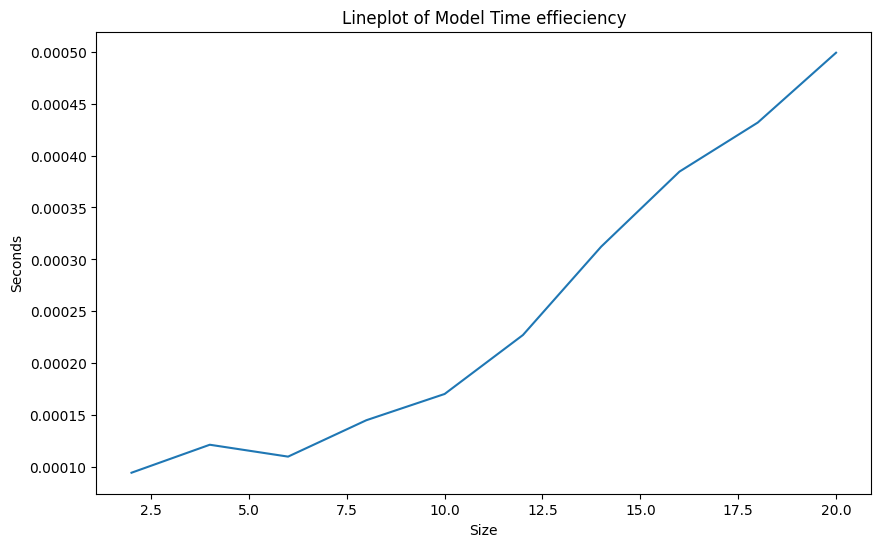


Runtime: [9.465217590332031e-05, 0.00012159347534179688, 0.00011014938354492188, 0.00014519691467285156, 0.0001704692840576172, 0.00022721290588378906, 0.0003123283386230469, 0.0003845691680908203, 0.0004317760467529297, 0.0004990100860595703]


In [ ]:
#Visualisasi Plot

# Combine actual and predicted values into a DataFrame for boxplot
results_df = pd.DataFrame({
    'Size': sampleSize,
    'Time': timeArr
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Size', y='Time')
plt.title('Lineplot of Model Time effieciency')
plt.ylabel('Seconds')
plt.show()

print("\nRuntime:", timeArr)

Visualisasi Plot untuk akurasi

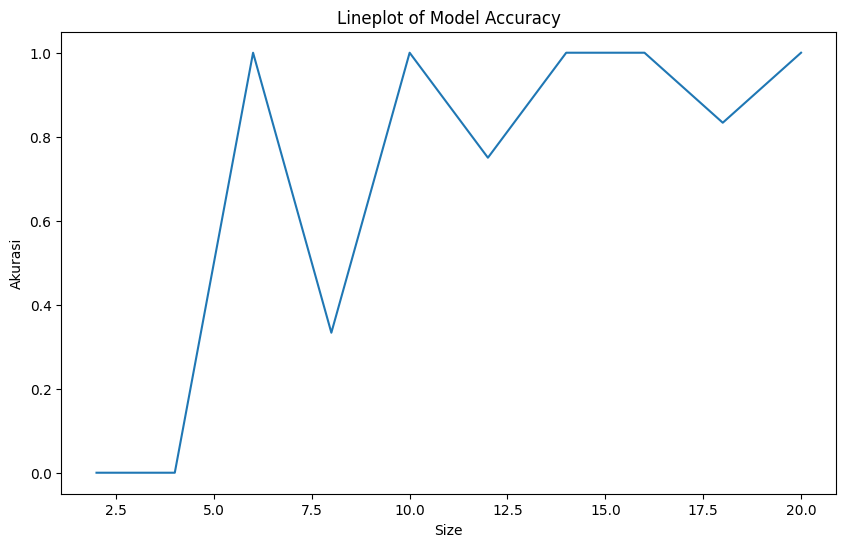


Accuracy: [0.0, 0.0, 1.0, 0.3333333333333333, 1.0, 0.75, 1.0, 1.0, 0.8333333333333334, 1.0]


In [ ]:
# Combine actual and predicted values into a DataFrame for boxplot
results_df = pd.DataFrame({
    'Size': sampleSize,
    'R2': r2
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Size', y='R2')
plt.title('Lineplot of Model Accuracy')
plt.ylabel('Akurasi')
plt.show()

print("\nAccuracy:", r2)

In [ ]:
dataset = np.concatenate((X_test, np.array(y_test), y_predictReal), axis=1)
df = pd.DataFrame(dataset, columns=['Date Length (cm)',	'Date Diameter (cm)'	,'Date Weight (g)',	'Pit Length (cm)',	'Calories (Kcal)'	,'Color', 'Prediction','Real'])
df


,Date Length (cm),Date Diameter (cm),Date Weight (g),Pit Length (cm),Calories (Kcal),Color,Prediction,Real
0,5.0,2.0,17.0,2.0,53.72,1.0,0.0,0.0
1,4.6,1.7,13.0,2.7,41.08,1.0,1.0,1.0
2,3.6,2.5,9.0,2.7,30.96,0.0,1.0,1.0
3,5.2,1.4,17.0,2.6,53.72,1.0,0.0,0.0
4,4.2,1.8,16.0,2.3,50.56,1.0,0.0,0.0
5,5.0,1.4,15.0,2.5,47.40,1.0,0.0,0.0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, np.array(y_predictReal))
accuracy = accuracy_score(y_test, np.array(y_predictReal))
report = classification_report(y_test, np.array(y_predictReal))
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


Confusion Matrix:
[[4 0]
 [0 2]]


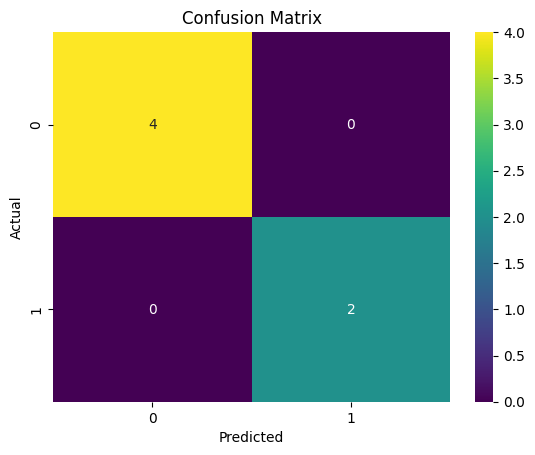

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')  # Change 'viridis' to any other valid color map

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

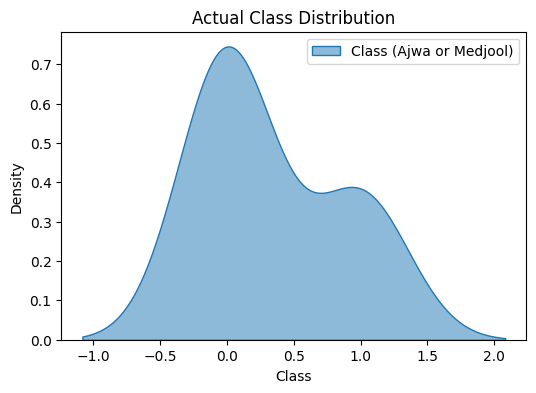

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

# Plot the actual class distribution using kdeplot with hex color code
sns.kdeplot(y_test, color='#FF0000', fill=True, alpha=0.5)  # Hex code for magenta

plt.title('Actual Class Distribution')
plt.xlabel('Class')
plt.ylabel('Density')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))

# Plot the actual class distribution

# Plot the predicted class distribution on the same axes
sns.kdeplot(np.array(y_predictReal), color="m", label="Predicted", fill=True)

plt.title('Predicted class')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.kdeplot(y_test, color="blue", fill=True, label="Actual")

sns.kdeplot(np.array(y_predictReal), color="orange", label="Predicted", fill=True)

plt.title('Predicted class vs actual class')
plt.legend()
plt.show()

## **Analisis dan kesimpulan**

Dari Proses yang telah dilakukan ada beberapa poin yang telah didapatkan

1. Akurasi

	percobaan yang dilakukan memunculkan nilai akurasi 1 dimana hasil prediksi sama dengan hasil data tes yang ada,ini menandakan model machine learning yang diguanakan sudah bagus dan juga  jumlah data yang sedikit hanya 20 entry menjadi salah satu faktornya

2. MSE(Mean Squared Error)

	Dengan nilai akurasi 1.0 dilakukan tes untuk mendapatkan nilai MSE dimana hasilnya 0.0, hasil MSE yang kecil menandakan model yang digunakan sudah bagus dan juga faktor yang sedikit

3. Waktu proses

	Waktu proses dari percobaan ini sangat singkat dengan rata" 0.000233 tentu ini waktu pemprosesan yang cepat.

Kesimpulan

Pada Kasus ini dengan sedikitnya jumlah data dan adanya kolom atribut warna yang secara langsung mencerminkan nilai label membuat dampak besar pada pada kinerja Model yang ada yang mengahasilka nilai akurasi dan MSE yang didapatkan serta waktu eksekusi yang cepat, akan tetapi pada model ini masih diperlukan adanya pengetesan kembali dengan jumlah data yang lebih banyak untuk memasikan secara pasti kebagusan dari model machine learning yang dibuat


